<a href="https://colab.research.google.com/github/nerissavu/CHEG472-Week2Lession2/blob/main/Week2Lession2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/Biomass Gasification Dataset.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Print the first 5 columns
print(df.iloc[:, :5])

            feed         Type of Feed      C     H     N
0    Fruit Waste          Orange Peel  41.71  6.04  1.91
1    Fruit Waste          Orange Peel  41.71  6.04  1.91
2    Fruit Waste          Orange Peel  41.71  6.04  1.91
3    Fruit Waste          Orange Peel  41.71  6.04  1.91
4    Fruit Waste          Orange Peel  41.71  6.04  1.91
..           ...                  ...    ...   ...   ...
239        Waste  Food Waste(Kitchen)  41.20  6.71  1.47
240        Waste  Food Waste(Kitchen)  41.20  6.71  1.47
241        Waste  Food Waste(Kitchen)  41.20  6.71  1.47
242        Waste  Food Waste(Kitchen)  41.20  6.71  1.47
243        Waste  Food Waste(Kitchen)  41.20  6.71  1.47

[244 rows x 5 columns]


In [ ]:
num_rows, num_cols = df.shape

print("Number of row", num_rows)
print("Number of column", num_cols)

Number of row 244
Number of column 25


In [ ]:
# Get the data types of all columns
data_types = df.dtypes

# Print the data types
print(data_types)

feed                       object
Type of Feed               object
C                         float64
H                         float64
N                         float64
S                         float64
O                         float64
ASH                       float64
C-H Aromatics               int64
C-H  Alkanes                int64
C-O                         int64
C=C                         int64
C=O                         int64
O-H                         int64
Temp                        int64
Time                        int64
BC                        float64
Reactor                    object
Catalyst Type              object
Catalyst Concentration    float64
CO2 mole fraction         float64
H2 mole fraction          float64
Hydrogen selectivity      float64
CO mole fraction          float64
CH4 mole fraction         float64
dtype: object


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


feed                      0
Type of Feed              0
C                         0
H                         0
N                         0
S                         0
O                         0
ASH                       0
C-H Aromatics             0
C-H  Alkanes              0
C-O                       0
C=C                       0
C=O                       0
O-H                       0
Temp                      0
Time                      0
BC                        0
Reactor                   0
Catalyst Type             0
Catalyst Concentration    0
CO2 mole fraction         0
H2 mole fraction          0
Hydrogen selectivity      0
CO mole fraction          0
CH4 mole fraction         0
dtype: int64


In [ ]:
# Column "type of feed" represent the type of biomass feed.


In [ ]:
unique_values = df["Type of Feed"].unique()
print(unique_values)


['Orange Peel' 'Banana Peel' 'Watermelon Peel' 'PET' 'wheat straw'
 'Crude Glycerol' 'Dunalila salina- CGLY 4%' 'Esperolina Plantis- CGLY 4%'
 'Chulorala Valgaris- CGLY 4%' 'Dunalila salina- Dionized Water'
 'Esperolina Plantis- Dionized Water' 'Chulorala Valgaris-Dionized Water'
 'Wood' 'Black Liquor' 'Black Liquor- Wood 3%' 'Black Liqour- Wood 5%'
 'Black Liquor- Wood 7%' 'Black Liquor- Wood 3%- Formic Acid'
 'Black Liquor- Wood 5%- Formic Acid' 'Black Liquor- Wood 7%- Formic Acid'
 'Distillition Waste water' 'Dairy Waste water based on Cheese'
 'Dairy Waste water based on Milk' 'Food Waste(Kitchen)']


In [ ]:
required_columns = ['Type of Feed', 'C', 'H', 'N', 'S', 'O', 'ASH']
grouped_stats = df.groupby('Type of Feed')[['C', 'H', 'N', 'S', 'O', 'ASH']].agg(['mean', 'std', 'min', 'max'])
print(grouped_stats)

                                        C                        H             \
                                     mean  std    min    max  mean  std   min   
Type of Feed                                                                    
Banana Peel                         41.34  NaN  41.34  41.34  5.99  NaN  5.99   
Black Liqour- Wood 5%               35.58  NaN  35.58  35.58  4.21  NaN  4.21   
Black Liquor                        35.58  0.0  35.58  35.58  4.21  0.0  4.21   
Black Liquor- Wood 3%               35.58  NaN  35.58  35.58  4.21  NaN  4.21   
Black Liquor- Wood 3%- Formic Acid  35.58  NaN  35.58  35.58  4.21  NaN  4.21   
Black Liquor- Wood 5%- Formic Acid  35.58  NaN  35.58  35.58  4.21  NaN  4.21   
Black Liquor- Wood 7%               35.58  NaN  35.58  35.58  4.21  NaN  4.21   
Black Liquor- Wood 7%- Formic Acid  35.58  NaN  35.58  35.58  4.21  NaN  4.21   
Chulorala Valgaris- CGLY 4%         52.20  0.0  52.20  52.20  7.10  0.0  7.10   
Chulorala Valgaris-Dionized 

In [ ]:
# Find the minimum and maximum temperatures
min_temp = df['Temp'].min()
max_temp = df['Temp'].max()

# Print the temperature range
print("Temperature Range:")
print("Minimum:", min_temp)
print("Maximum:", max_temp)

Temperature Range:
Minimum: 80
Maximum: 400


**Feature Engineering**

In [ ]:
#Reactor is not important
df = df.drop('Reactor', axis=1)
print(df.columns)


Index(['feed', 'Type of Feed', 'C', 'H', 'N', 'S', 'O', 'ASH',
       'C-H Aromatics ', 'C-H  Alkanes', 'C-O ', 'C=C ', 'C=O ', 'O-H ',
       'Temp', 'Time', 'BC', 'Catalyst Type', 'Catalyst Concentration',
       'CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity',
       'CO mole fraction', 'CH4 mole fraction'],
      dtype='object')


In [ ]:
# Calculate C/H and O/H ratios
df['C/H Ratio'] = df['C'] / df['H']
df['O/H Ratio'] = df['O'] / df['H']

grouped_stats = df.groupby('Type of Feed')[['C/H Ratio', 'O/H Ratio']].agg(['mean', 'std', 'min', 'max'])

print(grouped_stats)


                                    C/H Ratio                             \
                                         mean  std        min        max   
Type of Feed                                                               
Banana Peel                          6.901503  NaN   6.901503   6.901503   
Black Liqour- Wood 5%                8.451306  NaN   8.451306   8.451306   
Black Liquor                         8.451306  0.0   8.451306   8.451306   
Black Liquor- Wood 3%                8.451306  NaN   8.451306   8.451306   
Black Liquor- Wood 3%- Formic Acid   8.451306  NaN   8.451306   8.451306   
Black Liquor- Wood 5%- Formic Acid   8.451306  NaN   8.451306   8.451306   
Black Liquor- Wood 7%                8.451306  NaN   8.451306   8.451306   
Black Liquor- Wood 7%- Formic Acid   8.451306  NaN   8.451306   8.451306   
Chulorala Valgaris- CGLY 4%          7.352113  0.0   7.352113   7.352113   
Chulorala Valgaris-Dionized Water    7.352113  NaN   7.352113   7.352113   
Crude Glycer

**Hot encoding**

In [ ]:
# Perform one-hot encoding on 'Type of feed'
df_encoded = pd.get_dummies(df, columns=['Type of Feed'], prefix='Feed')
print("\nEncoded Data Info:")
print(df_encoded.info())
print("\nFirst few rows of encoded data:")
print(df_encoded.head())



Encoded Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   feed                                     244 non-null    object 
 1   C                                        244 non-null    float64
 2   H                                        244 non-null    float64
 3   N                                        244 non-null    float64
 4   S                                        244 non-null    float64
 5   O                                        244 non-null    float64
 6   ASH                                      244 non-null    float64
 7   C-H Aromatics                            244 non-null    int64  
 8   C-H  Alkanes                             244 non-null    int64  
 9   C-O                                      244 non-null    int64  
 10  C=C                           

In [ ]:
# Calculate the number of new columns created
new_columns = len(df_encoded.columns) - len(df.columns) + 1  # +1 because we removed the original 'Type of feed' column
print(f"Number of new columns created by one-hot encoding: {new_columns}")


Number of new columns created by one-hot encoding: 24


**Handling Outliers**

In [ ]:
import numpy as np
from scipy import stats

rows_to_remove = set()
gas_mole_fraction_column = ["CO2 mole fraction", "H2 mole fraction", "CO mole fraction", 'CH4 mole fraction']
for column in gas_mole_fraction_column:
      print(f"\nAnalyzing outliers in {column}:")

      # Calculate Z-score
      z_scores = np.abs(stats.zscore(df[column]))

      # Identify outliers (Z-score > 3)
      outliers = df[z_scores > 3]

      print(f"Number of outliers: {len(outliers)}")
      if len(outliers) > 0:
          print("Outlier values:")
          print(outliers[column])
          rows_to_remove.update(outliers.index)


Analyzing outliers in CO2 mole fraction:
Number of outliers: 0

Analyzing outliers in H2 mole fraction:
Number of outliers: 0

Analyzing outliers in CO mole fraction:
Number of outliers: 4
Outlier values:
90    75.0
91    75.0
92    78.0
93    75.0
Name: CO mole fraction, dtype: float64

Analyzing outliers in CH4 mole fraction:
Number of outliers: 3
Outlier values:
153    26.29
156    24.37
237    24.00
Name: CH4 mole fraction, dtype: float64


In [ ]:
# I will normally remove outliers. => Remove all the row with the outliers

df_cleaned = df.drop(rows_to_remove)
print(f"\nNumber of rows removed: {len(rows_to_remove)}")
print(f"Number of rows in cleaned dataset: {len(df_cleaned)}")


Number of rows removed: 7
Number of rows in cleaned dataset: 237


**Exploratory Data Analysis**

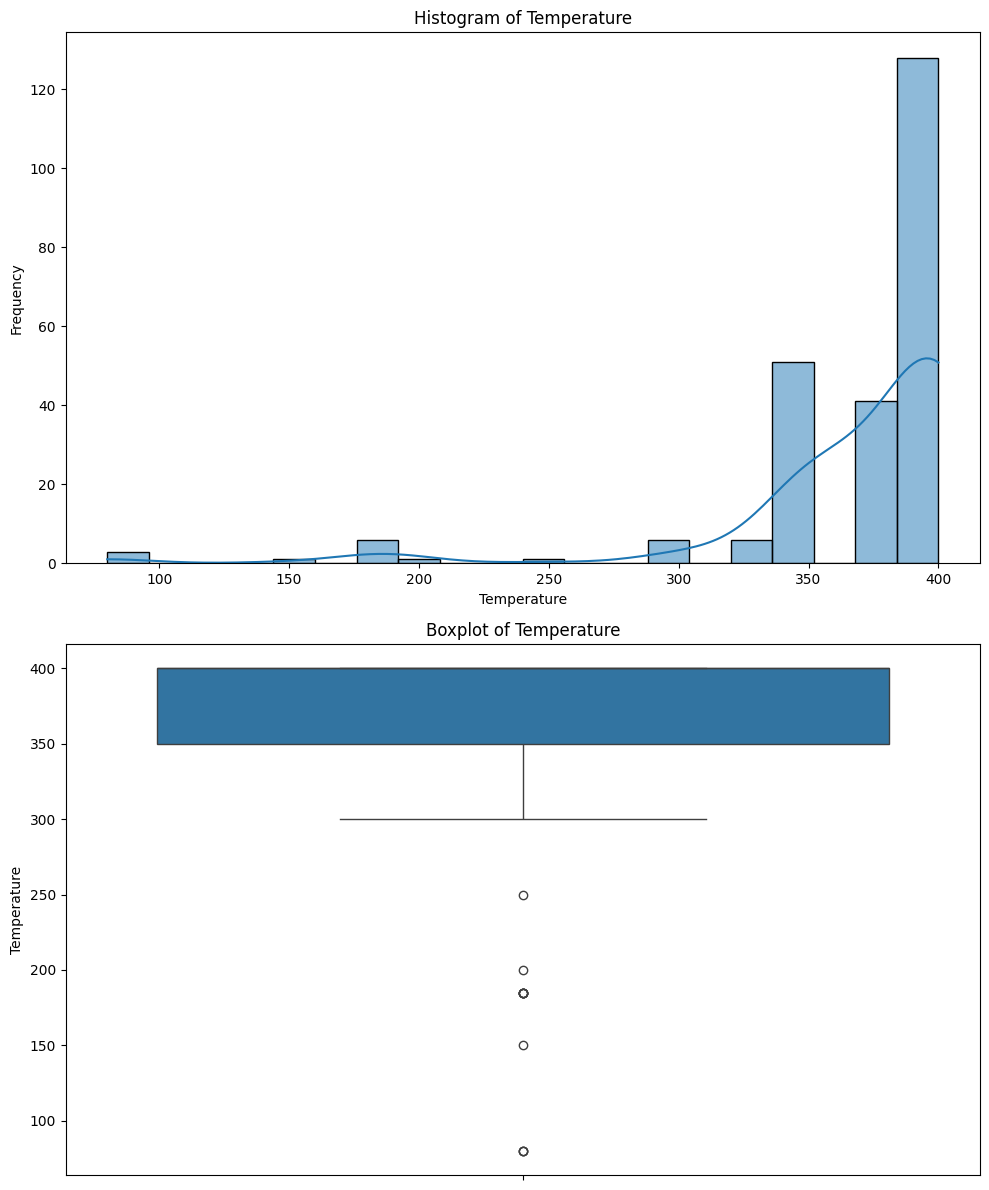

In [ ]:
# Temperature histogram
# Create the histogram
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Histogram
sns.histplot(data=df, x='Temp', kde=True, ax=ax1)
ax1.set_title('Histogram of Temperature')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df, y='Temp', ax=ax2)
ax2.set_title('Boxplot of Temperature')
ax2.set_ylabel('Temperature')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#Comment about temperature
Distribution: The temperature distribution is highly skewed to the right (positively skewed)

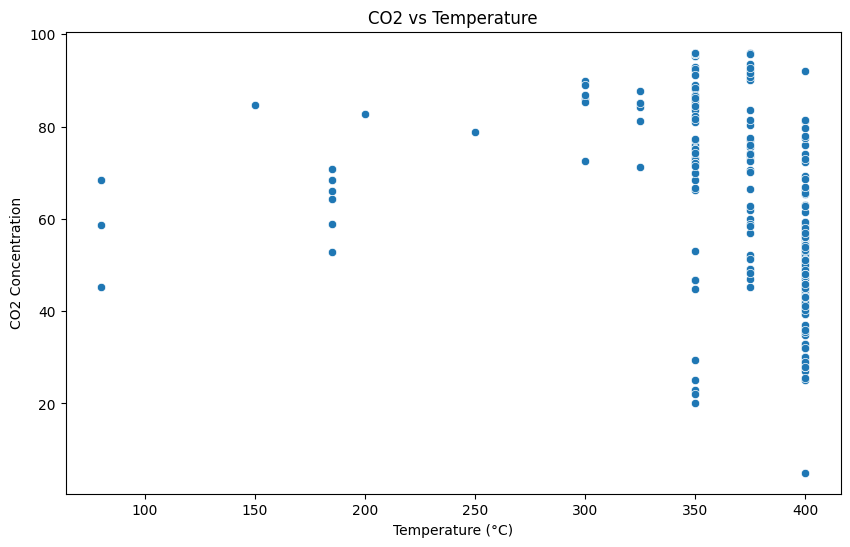

In [ ]:
# Correlation between temperature and CO2 mol fraction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp', y='CO2 mole fraction')
plt.title('CO2 vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('CO2 Concentration')
plt.show()

No clear linear trend: There isn't a obvious linear pattern (either positive or negative) as temperature increases.
Wide spread of data: At higher temperatures (350°C and 400°C), there's a very wide range of CO2 mole fractions, from very low (near 0) to very high (near 100).


In [ ]:
# Split the Data

# Define the target columns
target_columns = ['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity',
                  'CO mole fraction', 'CH4 mole fraction']

# Create the target DataFrame Y
Y = df[target_columns]

# Create the feature DataFrame X by dropping the target columns
X = df.drop(columns=target_columns)

# Print info about the split
print("Features (X):")
print(X.columns.tolist())
print(f"Shape of X: {X.shape}")

print("\nTargets (Y):")
print(Y.columns.tolist())
print(f"Shape of Y: {Y.shape}")

# Optional: Display the first few rows of X and Y
print("\nFirst few rows of X:")
print(X.head())

print("\nFirst few rows of Y:")
print(Y.head())

# # Optional: Save X and Y to csv files
# X.to_csv('features.csv', index=False)
# Y.to_csv('targets.csv', index=False)
# print("\nFeatures and targets have been saved to 'features.csv' and 'targets.csv'")

Features (X):
['feed', 'Type of Feed', 'C', 'H', 'N', 'S', 'O', 'ASH', 'C-H Aromatics ', 'C-H  Alkanes', 'C-O ', 'C=C ', 'C=O ', 'O-H ', 'Temp', 'Time', 'BC', 'Catalyst Type', 'Catalyst Concentration', 'C/H Ratio', 'O/H Ratio']
Shape of X: (244, 21)

Targets (Y):
['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction']
Shape of Y: (244, 5)

First few rows of X:
          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  C=C   C=O   O-H   Temp  Time    BC  \
0               1             1  ...     1     1     1   350    30   5.0   
1               1             1